# Реализовать разложение по сингулярным значениям (SVD) для ленточных матриц.
## создание произвольной ленточной матрицы.
На вход подаётся массив $n \times m$ - в таком виде хранятся ленточные матрицы.
$n$ - размер матрицы, $m$ - ширина ленты, нечётное число.
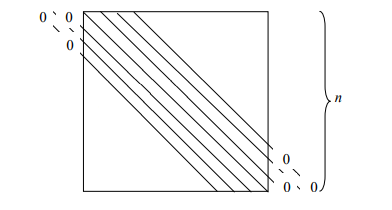

In [1]:
import numpy as np

In [2]:
def random_tape(n, m, seed=1234):
    '''
    создаёт случайную ленту, на основе которой будет создана ленточная матрица
    n - длина ленты
    m - ширина ленты
    '''
    tape = np.zeros((n, m))
    l = (m - 1) // 2 #полуширина ленты
    for j in range(l, -1, -1):
        tape[j:, l - j] = np.random.rand(n - j)
    for j in range(1, l + 1):
        tape[:n - j, l + j] = np.random.rand(n - j)
    return tape

In [3]:
def tape_matrix(tape):
    '''
    создаёт ленточную матрицу из ленты tape
    крайние элементы столбцов ленты должны содержать нули согласно рисунку выше
    '''
    n, m = tape.shape
    l = (m - 1) // 2
    matrix = np.zeros((n, n))
    
    i = 0
    for j in range(l, -1, -1):
        matrix[i, :i + l + 1] = tape[i, j:]
        i += 1
    start = i
    i = n - 1
    for j in range(l, 0, -1):
        matrix[i, i - l:] = tape[i, : -j]
        i -= 1
    stop = i
    for i in range(start, stop + 1):
        matrix[i, i - l : i + l + 1] = tape[i]
    return matrix

In [4]:
A = tape_matrix(random_tape(5, 3))

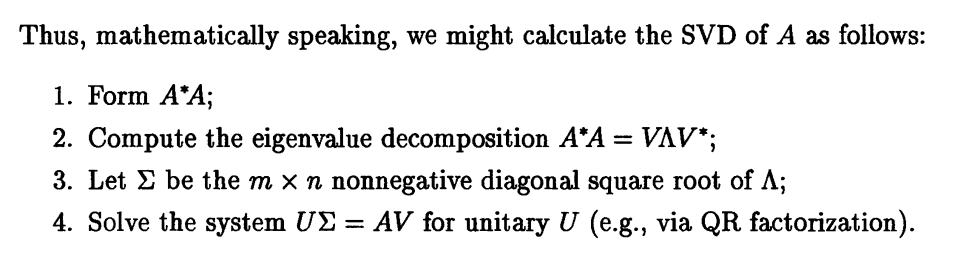

In [5]:
A2 = A.T @ A
print(A2)

[[1.62974834 1.28542063 0.30416797 0.         0.        ]
 [1.28542063 1.46358679 0.5584212  0.22903357 0.        ]
 [0.30416797 0.5584212  1.20448701 0.29091122 0.39742026]
 [0.         0.22903357 0.29091122 0.48629492 0.52482215]
 [0.         0.         0.39742026 0.52482215 0.79828429]]


In [6]:
w, v = np.linalg.eig(A2)
n = A2.shape[0]
L = np.zeros((n, n))
for i in range(n):
    L[i, i] = w[i]
np.allclose(A2, v @ L @ np.linalg.inv(v))

True

In [7]:
Sigma = np.sqrt(L)

In [8]:
u = A @ v @ np.linalg.inv(Sigma)

In [9]:
np.allclose(A, u @ Sigma @ np.linalg.inv(v))

True

In [10]:
u_qr, Sigma_qr = np.linalg.qr(A @ v)

In [11]:
np.allclose(A, u_qr @ Sigma_qr @ np.linalg.inv(v))

True

In [12]:
np.allclose(A, u_qr @ Sigma_qr @ v.T)

True

In [13]:
n = A.shape[0]
H = np.zeros((2 * n, 2 * n))
H[:n, n:] = A.T
H[n:, :n] = A

In [14]:
w_H, vu_H = np.linalg.eig(H)
Sigma_H = np.zeros((2 * n, 2 * n))
for i in range(2 * n):
    Sigma_H[i, i] = w_H[i]
np.allclose(H, vu_H @ Sigma_H @ np.linalg.inv(vu_H))

True

In [15]:
v_st = vu_H[:n, :n]
u_st = vu_H[n:, :n]

Sigma_st = Sigma_H[:n, :n]

In [16]:
np.allclose(A, u_st @ Sigma_st @ np.linalg.inv(v_st))

False

In [17]:
np.set_printoptions(precision=2)
print(vu_H)

[[-0.46 -0.46  0.24 -0.24 -0.18 -0.38  0.18 -0.38  0.22  0.22]
 [-0.47 -0.47  0.08 -0.08  0.02  0.43 -0.02  0.43 -0.3  -0.3 ]
 [-0.24 -0.24 -0.41  0.41  0.5  -0.14 -0.5  -0.14  0.09  0.09]
 [-0.08 -0.08 -0.3   0.3  -0.28  0.32  0.28  0.32  0.47  0.47]
 [-0.06 -0.06 -0.43  0.43 -0.37 -0.22  0.37 -0.22 -0.36 -0.36]
 [-0.41  0.41  0.21  0.21 -0.18 -0.09 -0.18  0.09 -0.5   0.5 ]
 [-0.49  0.49  0.12  0.12  0.01 -0.14  0.01  0.14  0.47 -0.47]
 [-0.26  0.26 -0.19 -0.19  0.18  0.6   0.18 -0.6  -0.04  0.04]
 [-0.15  0.15 -0.48 -0.48  0.34 -0.33  0.34  0.33 -0.14  0.14]
 [-0.05  0.05 -0.41 -0.41 -0.57  0.02 -0.57 -0.02  0.07 -0.07]]


In [18]:
print(H)

[[0.   0.   0.   0.   0.   0.87 0.93 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.66 0.76 0.67 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.33 0.46 0.94 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.34 0.14 0.59]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.42 0.79]
 [0.87 0.66 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.93 0.76 0.33 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.67 0.46 0.34 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.94 0.14 0.42 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.59 0.79 0.   0.   0.   0.   0.  ]]
